In [1]:
# Whenever using external files along with Ipython use autoreload. 
# It will reload the external files every time before executing any code in IPython.
%load_ext autoreload
%autoreload 2

In [2]:
from micrograd.nn import *
from micrograd.visualization import draw_dot

In [119]:
x = [2.0, 3.0, 5.0]
n = MLP(3, [4, 4, 1])
result = n(x)
result

Value(data=-0.8871484747881353, grad=0)

In [24]:
for idx, layer in enumerate(n.layers):
    print('layer ', idx)
    for inx, neuron in enumerate(layer.neurons):
        print('- neuron ', inx)
        for weight in neuron.w:
            print('weigth: ', weight.data)
        print('bias: ', neuron.b.data)
    print()

layer  0
- neuron  0
weigth:  0.9916079911975679
weigth:  -0.7604244268190339
weigth:  -0.21658938978781994
bias:  0.0575357480508043
- neuron  1
weigth:  0.32012422912050575
weigth:  -0.43559359582025414
weigth:  0.7552989836294157
bias:  -0.39343991262126443
- neuron  2
weigth:  0.3008182081610131
weigth:  0.6388146418255396
weigth:  -0.12253955216897783
bias:  0.23866859209575453
- neuron  3
weigth:  -0.8843199465143099
weigth:  0.8176039641525763
weigth:  0.6980311492828704
bias:  -0.7277673783624654

layer  1
- neuron  0
weigth:  -0.3869685872875894
weigth:  0.018553612295375776
weigth:  -0.9772624890885322
weigth:  0.5932785798186928
bias:  -0.5140676970156726
- neuron  1
weigth:  -0.9701477407373722
weigth:  -0.3067625364806972
weigth:  0.26130167960699713
weigth:  -0.38062651724748164
bias:  -0.267072550722143
- neuron  2
weigth:  0.7582950163185695
weigth:  0.586060131743608
weigth:  -0.5556447233639277
weigth:  -0.6213996121775576
bias:  0.679798750793136
- neuron  3
weigth: 

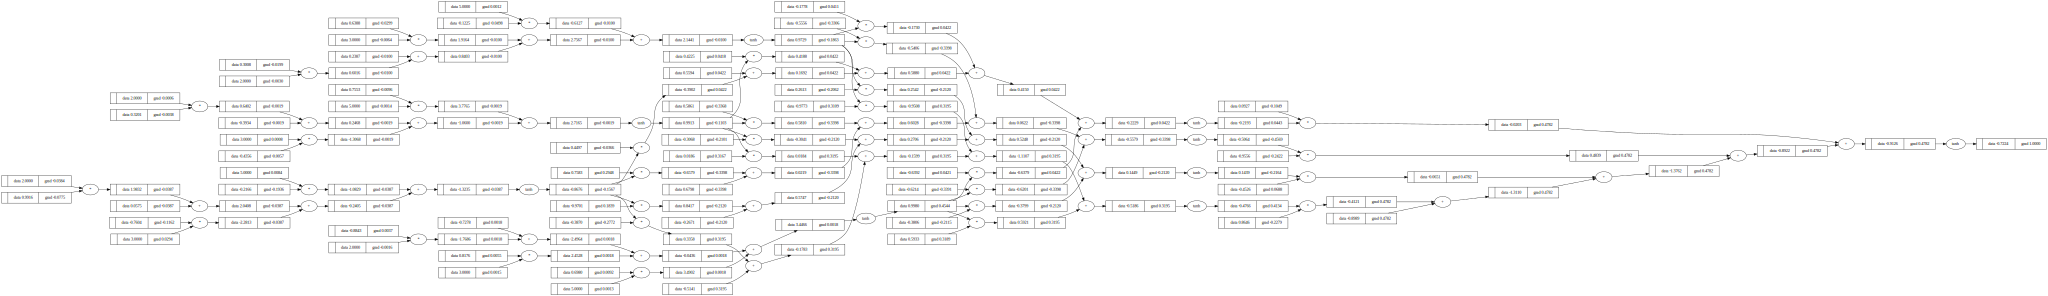

In [25]:
# type(result[0])
result.backward()
draw_dot(result)

In [120]:
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0]
]
ys = [1.0, -1.0, -1.0, 1.0]

In [121]:
for k in range(20):
    # forward pass
    ypred = [n(x) for x in xs]
    loss = sum((ygt-yout)**2 for ygt, yout in zip(ys, ypred))

    # backward
    for p in n.parameters():
        p.grad = 0.0
    loss.backward()

    # update
    for p in n.parameters():
        p.data += -0.05 * p.grad
    
    print(k, 'loss: ', loss.data)

0 loss:  7.713680793414698
1 loss:  7.58359565677364
2 loss:  7.34132495317151
3 loss:  6.8014029526110225
4 loss:  5.5049448798278515
5 loss:  4.023689986950532
6 loss:  3.5683341681352134
7 loss:  3.120363513905494
8 loss:  2.598086218557058
9 loss:  2.095410186507882
10 loss:  1.6426389616208283
11 loss:  1.2338758097179032
12 loss:  0.9055000138509993
13 loss:  0.6737854966431647
14 loss:  0.5176969675984439
15 loss:  0.411504692616908
16 loss:  0.3368786016629284
17 loss:  0.2825667029803948
18 loss:  0.24174879445706676
19 loss:  0.21020557483397317


In [13]:
len(n.parameters())

41

In [122]:
ypred

[Value(data=0.7285016260735238, grad=-0.5429967478529525),
 Value(data=-0.7596185663600719, grad=0.4807628672798563),
 Value(data=-0.7890855343392786, grad=0.4218289313214427),
 Value(data=0.8149971288722316, grad=-0.37000574225553673)]